#*Kernel Canvas*


O Kernel Canvas é um método de normalização capaz de lidar com dados que não possuem tamanho fixo. Sua concepção foi motivada para classificação de dados de séries temporais e/ou de ambientes dinâmicos, que, conforme se faz a necessidade, requerem registrar uma "janela de contexto" aumentando com tendência exponencial o tamanho dos dados. Nesse panorama, essa ferramenta também reduzir a dimensionalização dos dados mantendo a relação da janela.

run ```sudo apt install g++ gcc python3-dev for dependencies if running locally```

In [ ]:
#@title Install dependencies [RUN ME]
%pip install --upgrade setuptools
%pip install ipykernel
%pip install pybind11
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install ipywidgets
%pip install numba
%pip install pandas
%pip install wheel
%pip install git+https://github.com/IAZero/wisardpkg.git@develop


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 261.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 501.8/509.2 kB 150.6 MB/s eta 0:00:01

In [1]:
import wisardpkg as wp
import numpy as np
import matplotlib.pyplot as plt

## Implementação

Quando instâncidado, é necessário informar a dimensão dos dados (*dim*) a serem normalizados e o número de *Kernels* (*numberOfKernels*) que deseja se criar. O mínimo aceito é 1 para todos esses valores.

Quanto aos parâmetros opcionais:
- ***bitsBykernel*** : como o nome indica, se refere a quantidade de bits que representará cada *kernel*. Mínimo aceito é 1 e o padrão quando não informado.

- ***activationDegree*** : se refere a proporção de *kernels* a serem ativados.

- ***useDirection*** : quando ativado, considera a *janela de contexto* dos dados. Guarda, para cada kernel, o valor do kernel que foi acessado antes e o depois.



```
numberOfKernels = 10
dimension = 2

kc = KernelCanvas(
    dimension,               # required; type [int]
    numberOfKernels,         # required; type [int]
    bitsBykernel = 3,        # optional; type [int]
    activationDegree = 0.07, # optional; type [float]
    useDirection = False     # optional; type [boolean]
)
```

In [9]:
from random import random

## Criando objeto para dados de 2 dimensões, 10 kernels e 3 bitis pra cada kernel
kc = wp.KernelCanvas(2,10, bitsByKernel = 3, activationDegree=0.07, useDirection=False)

Dando uma olhada nos dados

In [10]:

### Criação de dados
sequenceData = []
for i in range(10):
    point = [0.0,0.0] # duas dimensões
    point[0] = 10*random()
    point[1] = 10*random()
    sequenceData.append(point)

sequenceData

[[1.2048144456529508, 8.418399239480852],
 [0.30082036118507904, 9.799966622005254],
 [1.6629415891685406, 2.2848481322212844],
 [0.9458521553642063, 8.949325263801768],
 [4.799267839549445, 2.501954540905081],
 [5.992828666198424, 8.685327314347063],
 [5.122071596444243, 5.2569227523289355],
 [0.3205207434936741, 5.88832867308402],
 [9.422398761068308, 0.5412965403207659],
 [9.11220679173161, 6.410396222943277]]

###Fazendo transformação - Método *transform()*

O método recebe uma **lista** de pontos de valores reais e retorna uma lista de novos inputs binários mapeados pelos kernels. O tamanho será igual a `numberOfKernels * bitsBykernel`.

In [11]:
out = kc.transform(sequenceData)
print(out)
print(len(out))

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]
30


In [12]:
sequence_ = []
sequenceData_ = []

for i in range(10):
  sequenceData_ = []
  for j in range(10):
    point = [0.0,0.0]
    point[0] = 10*random()
    point[1] = 10*random()
    sequenceData_.append(point)

  sequence_.append(sequenceData_)

In [13]:
sequence_[0]

[[6.360067321273526, 5.140223517557203],
 [6.982349478565024, 1.0577602527689423],
 [8.471992784922481, 9.416632597280701],
 [6.915432158493204, 7.737302862992469],
 [3.4756567094763025, 9.57857991047023],
 [1.9098399359940288, 7.395360770496813],
 [9.077712831105668, 3.7521496147192868],
 [8.477573532905877, 8.306783087435347],
 [3.8474269504176037, 1.6810729908332678],
 [3.5082828803768393, 6.652709211301967]]

In [14]:
out_ = [kc.transform(x) for x in sequence_]

for i in range(10):
  print(*out_[i],'\n')

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 

0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 

1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 

1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 

1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 

1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 

1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 

1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 

1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 

1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 



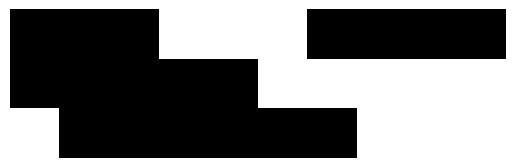

In [15]:

im = np.reshape(out, (3,10))
im = 1 - im

plt.imshow(im, cmap="gray", vmin=0., vmax=1.)
plt.axis("off")
plt.show()

-----

In [17]:
#@title Exemplo em construção
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


pendigits = fetch_openml('pendigits', version=1, as_frame=False)

X = pendigits.data
y = pendigits.target

# Verificar a forma dos dados
print(f"Forma dos dados: {X.shape}")
print(f"Forma dos labels: {y.shape}")


Forma dos dados: (10992, 16)
Forma dos labels: (10992,)


In [18]:
X_ = [ ]
for i in range(len(X)):
  points = [ ]
  for j in range(0, len(X[0]), 2):
    point = [X[i, j], X[i, j+1]]
    points.append(point)
  X_.append(points)

In [19]:
X_[0]

[[np.int64(47), np.int64(100)],
 [np.int64(27), np.int64(81)],
 [np.int64(57), np.int64(37)],
 [np.int64(26), np.int64(0)],
 [np.int64(0), np.int64(23)],
 [np.int64(56), np.int64(53)],
 [np.int64(100), np.int64(90)],
 [np.int64(40), np.int64(98)]]

In [20]:
def show_digits(digit, label):
  x_coords = [point[0] for point in digit]
  y_coords = [point[1] for point in digit]
  plt.figure(figsize=(4,4))
  plt.title(f"Label: {label}")
  plt.plot(x_coords, y_coords, 'ro-')  # Plot the points
  plt.axis('equal')
  plt.show()

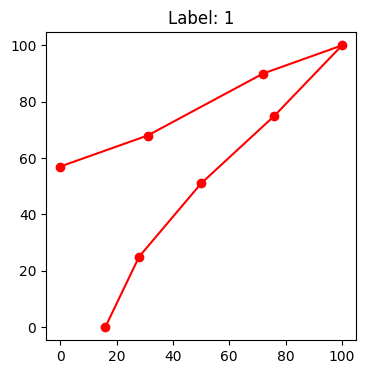

In [21]:
n = 2
show_digits(X_[n], y[n])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [23]:
X_test[0]

[[np.int64(27), np.int64(100)],
 [np.int64(0), np.int64(58)],
 [np.int64(12), np.int64(5)],
 [np.int64(62), np.int64(0)],
 [np.int64(100), np.int64(39)],
 [np.int64(97), np.int64(91)],
 [np.int64(48), np.int64(97)],
 [np.int64(18), np.int64(53)]]

In [24]:
kernel_ = wp.KernelCanvas(2, 256, bitsByKernel = 1, useDirection=True)

In [25]:
train_points = [kernel_.transform(x) for x in X_train]
test_points = [kernel_.transform(x) for x in X_test]

for i in range(8):
  print(*train_points[i],'\n')

0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 

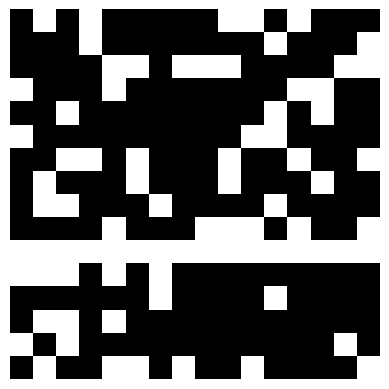

In [26]:
bitmap = np.reshape(train_points[0], (16,16))

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.axis('off')  # Remove os eixos
plt.show()

In [27]:
model = wp.Wisard(32)

In [28]:
train_ds = wp.DataSet(train_points, y_train)
test_ds = wp.DataSet(test_points, y_test)

In [29]:
model.train(train_ds)

In [30]:
pred = model.classify(test_ds)

In [31]:
def accuracy(y_pred, y_target):
  return np.where(y_pred == y_target, 1, 0).sum()/len(y_target)

In [32]:
accuracy(pred, y_test)

np.float64(0.9331514324693042)